In [8]:
# PAGA
import scanpy as sc
import numpy as np

In [2]:
adata = sc.datasets.pbmc3k()  # Built-in example; or use sc.read_10x_h5(...) / sc.read_h5ad(...)

In [3]:
# 2. Basic preprocessing: filter, normalize, and log-transform
sc.pp.filter_cells(adata, min_genes=200)        # Remove cells with fewer than 200 detected genes
sc.pp.filter_genes(adata, min_cells=3)          # Remove genes expressed in fewer than 3 cells
sc.pp.normalize_total(adata, target_sum=1e4)    # Normalize each cell’s total counts to 10,000
sc.pp.log1p(adata)                              # Apply log(x + 1) transformation

In [4]:
# 3. Identify highly variable genes (HVGs); subset to top 2,000
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='seurat_v3')
adata = adata[:, adata.var.highly_variable]     # Keep only HVGs

/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
# 5. Run PCA as a preprocessing step 
sc.pp.pca(adata, n_comps=50, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)  

/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# 6. Clustering
sc.tl.leiden(adata, resolution=0.5)

/var/folders/nw/_qyjvbs92210zt5v3kqgyx4h0000gn/T/ipykernel_79122/1321902796.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


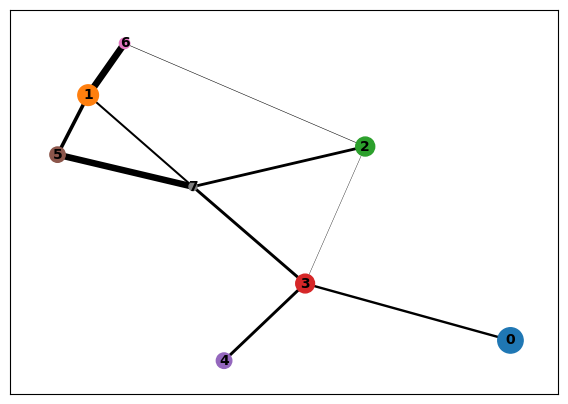

In [7]:
# 7. PAGA graph
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.03)


In [9]:
# 8. Choose root cluster from PAGA graph (e.g., cluster '0')
root_cells = adata.obs_names[adata.obs['leiden'] == '0']
adata.uns['iroot'] = np.flatnonzero(adata.obs_names == root_cells[0])[0]

In [10]:
# 5. Compute diffusion map & DPT
sc.tl.diffmap(adata, n_comps=10)
sc.tl.dpt(adata, n_dcs=10)

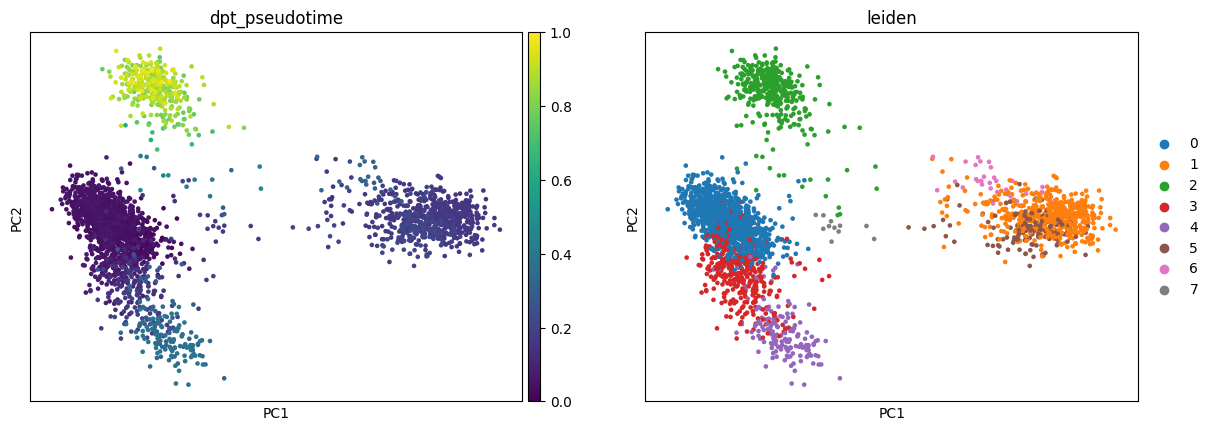

In [12]:
# 6. Visualize pseudotime on UMAP
sc.pl.pca(adata, color=['dpt_pseudotime', 'leiden'])